In [76]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_2_23/2023_01_04_00_28_36L10.npy',allow_pickle=True).tolist()
t = np.array(data['nT'])[:,1] # scan time
detuning = np.array(data['nT'])[:,3] # detuning
rabi = np.array(data['nT'])[:,2] # Rabi
E = np.array(data['E']) # energy for the lowest three states
overlap = np.array(data['overlap'])# overlap with fm, afm, ground state, 1st excited state, 2nd excited state

In [66]:
# Dilila parameter
initial_detuning = -5
final_detuning = 3
gap = (E[:,2]-E[:,0])/2/np.pi
crit_id = np.argmin(gap)
initial_id = np.argmin(abs((detuning - initial_detuning)))
final_id = np.argmin(abs((detuning - final_detuning)))
print('scanned initial detuning '+ str(detuning[initial_id]))
print('initial gap '+ str(gap[initial_id]))
print('crit_detuning'+str(detuning[crit_id]))
print('crit_gap'+str(gap[crit_id]))
print('scanned initial detuning '+ str(detuning[final_id]))
print('final gap '+ str(gap[final_id]))

scanned initial detuning -5.0
initial gap 5.262210240038558
crit_detuning1.2999999999999938
crit_gap0.7666651310944456
scanned initial detuning 2.9999999999999876
final gap 1.6277711208327794


Text(0, 0.5, 'Overlap <Ground state|evolve state>')

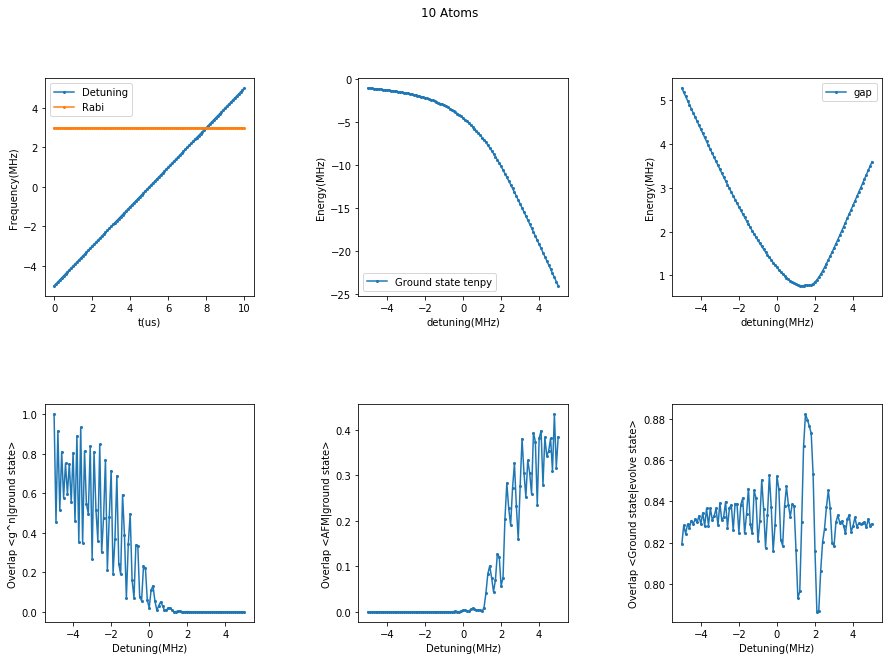

In [80]:
ms = 2
ls = '-'
fig, ax = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('10 Atoms')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,0].plot(t,detuning,marker='o',markersize = ms,ls = ls,label = 'Detuning')
ax[0,0].plot(t,rabi,marker='o',markersize = ms,ls = ls,label = 'Rabi')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
ax[0,0].legend()

ax[0,1].plot(detuning,(E[:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'Ground state tenpy')
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].legend()

ax[0,2].plot(detuning,(E[:,2]-E[:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'gap')
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')

ax[0,2].legend()

ax[1,0].plot(detuning,overlap[:,0],marker='o',markersize = ms,ls = ls)
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|ground state>')

ax[1,1].plot(detuning,overlap[:,1],marker='o',markersize = ms,ls = ls)
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|ground state>')

ax[1,2].plot(detuning,overlap[:,2],marker='o',markersize = ms,ls = ls)
ax[1,2].set_xlabel('Detuning(MHz)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')

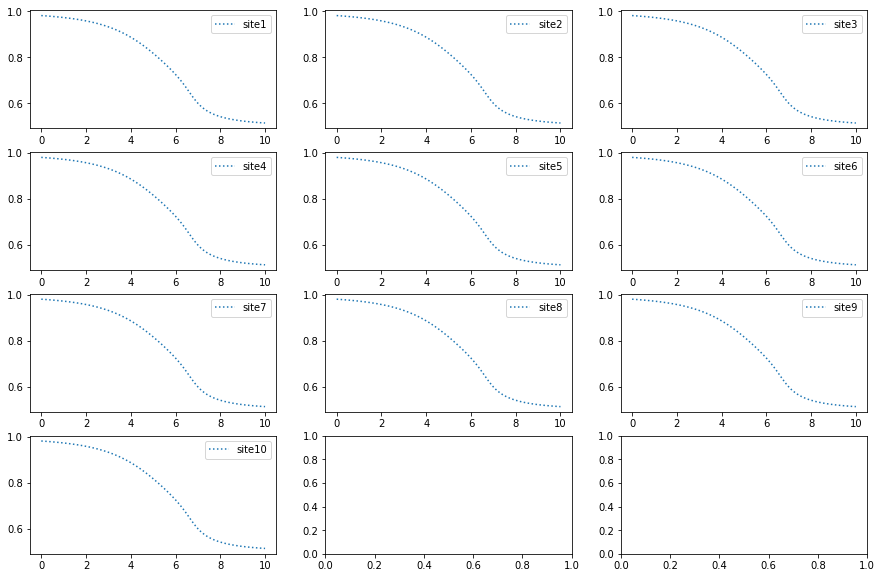

In [23]:
# benchmark ground state dynamics 
ms = 5
ls = ':'
fig, ax = plt.subplots(4, 3, figsize=(15,10))
for i in range(10):
    ax[i//3,i%3].plot(t,1-np.array(data['zg'])[:,i],markersize = ms,ls = ls,label='site'+str(i+1))
    ax[i//3,i%3].legend()

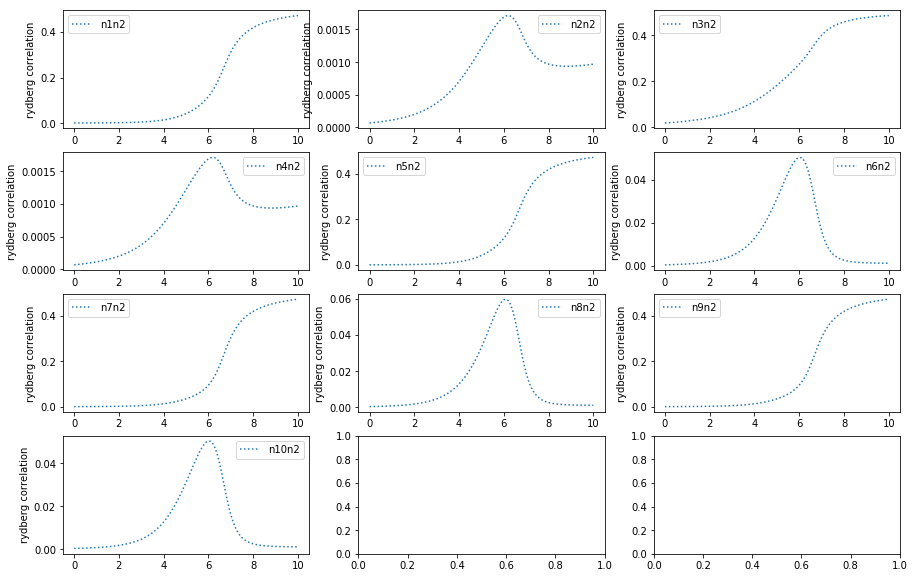

In [42]:
# benchmark rydberg state correlation to the j-th atom
j = 2
N = 10
fig, ax = plt.subplots(4, 3, figsize=(15,10))
for i in range(N):
    ax[i//3,i%3].plot(t,np.array(data['zzg'])[:,j,i],markersize = ms,ls = ls,label='n'+str(i+1)+'n'+str(j))
    ax[i//3,i%3].set_ylabel('rydberg correlation')
    ax[i//3,i%3].legend()

In [65]:
data['params']

{'dirc': './output_test/',
 'L': 10,
 'Omega': 1.5,
 'Delta_ini': -5.0,
 'Delta_fin': 5.0,
 'U': 15.0,
 'chi': 32,
 'dt': 0.1,
 'T': 10.0,
 'N_steps': 1,
 'ramp_time': 10.0}

In [69]:
10*(1.3+5)/(3+5)

7.875